In [1]:
import numpy as np
import math 
import sympy
import matplotlib.pyplot as plt

### 1. Create the vectors in `matplotlib`

In [2]:
import matplotlib.pyplot as plt

def vector_plot(x0, y0, x1, y1, clv, hL = 0.2, hW = 0.04):
    """
    This function is used to plot the vector/arrow though 2 points
    Args: 
        - (x0, y0) and (x1, y1) : coordinates of arrow base
        - clv (str): color of vector
        - HL, HW: head_length & head_width of vector/ arrow
    """
    ## length of arrow along x & y direction
    dx = x1 - x0
    dy = y1 - y0
    # plot the starting_point of vector
    plt.plot(x0, y0, clv, marker = 'o', label = 'from (%s, %s) to (%s, %s)'%(x0, y0, x1, y1))
    # plot the vector / arrow
    plt.arrow(x0, y0, dx, dy, color = clv, 
              head_length = hL, head_width = hW, 
              length_includes_head = False)

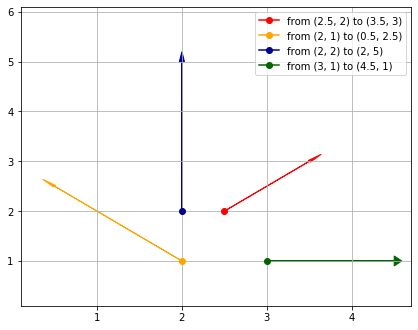

In [3]:
plt.figure(figsize = (7, 5.5))
plt.grid()
vector_plot(2.5, 2, 3.5, 3, 'red')
vector_plot(2, 1, 0.5, 2.5, 'orange')
vector_plot(2, 2, 2, 5, 'darkblue', 0.2, 0.06)
vector_plot(3, 1, 4.5, 1, 'darkgreen', .09, .2)
plt.xlim([0.1, 4.7])
plt.ylim([0.1, 6.1])
plt.legend()
plt.show()

**Reminder. gradient vector** `grad f` or $\nabla f$ is an `operator` defined by

$$ \nabla f\left( x_1, \ldots, x_n \right) = \left( \frac{\partial f}{\partial x_1} \left( x_1, \ldots, x_n \right), \frac{\partial f}{\partial x_2} \left( x_1, \ldots, x_n \right), \ldots, \frac{\partial f}{\partial x_n} \left( x_1, \ldots, x_n \right) \right) $$

In particular, 

- In $\mathbb{R}^2$, then 
$$ \nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right) \Leftrightarrow \nabla = \frac{\partial}{\partial x} \vec{i} + \frac{\partial}{\partial y} \vec{j} $$

- In $\mathbb{R}^3$, then 
$$ \nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z} \right) \Leftrightarrow \nabla = \frac{\partial}{\partial x} \vec{i} + \frac{\partial}{\partial y} \vec{j} + \frac{\partial}{\partial z} \vec{k} $$

### 2. Simulate gradient with arrow vectors

Let $f(x, y) = x^2 + y^2$, then

$$ \nabla f (x, y) = (2 x, 2y ) $$

Now, we will plot the `vector field` of 
$$F(x, y) = \nabla f (x, y)$$ 

on the domain $[-3, 3] \times [-3, 3]$. Beside that, we also see the `vector fields` of 

$$F(x, y) = (-y, x); \quad F (x, y) = (x+2y, -2x), \text{ and } F(x,y) = (xy, x^2 - 1)$$



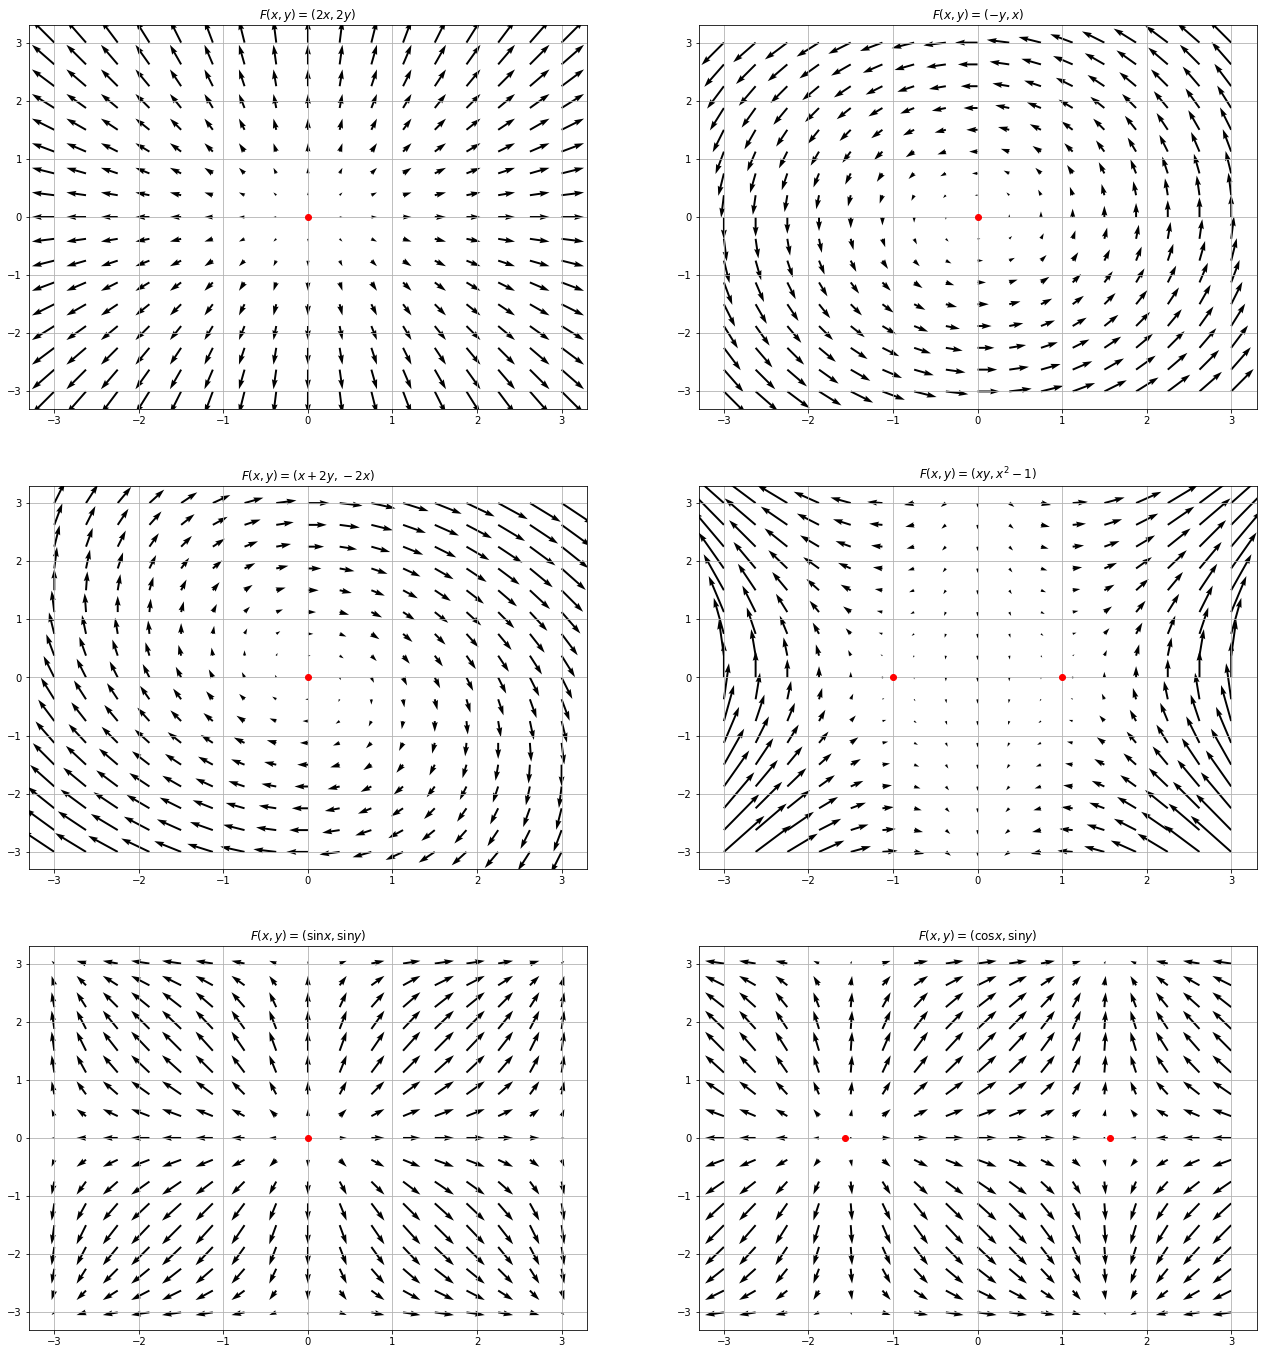

In [104]:
x = np.linspace(-3, 3, 17)
y = np.linspace(-3, 3, 17)
x, y = np.meshgrid(x, y)
F = [[2*x, 2*y], [-y, x], [x + 2*y, -2*x], [y*x, x**2 - 1], [np.sin(x), np.sin(y)], [np.cos(x), np.sin(y)]]
T = ['(2x, 2y)', '(-y, x)', '(x + 2y, -2x)', '(xy, x^2 - 1)', '(\sin x, \sin y)', '(\cos x, \sin y)']
P = [[0, 0], [0, 0], [0, 0], [[-1, 1], [0, 0]], [0, 0], [[-np.pi/2, np.pi/2], [0, 0]]]

plt.figure(figsize = (22, 24))
for k in range(6):
    plt.subplot(3, 2, k+1)
    plt.quiver(x, y, F[k][0], F[k][1])
    plt.title('$F(x, y) = %s$'%(T[k]))
    plt.plot(P[k][0], P[k][1], 'ro')
    plt.grid()
plt.show()

**Quick reminder: 2.1. Meshgrid**

Let $X, Y$ be 2 vectors in $\mathbb{R}^n, \mathbb{R}^m$ respectively, and

$$U, V = \text{meshgrid} (X,Y)$$

Then $U, V$ be the matrices rank $m \times n$ defined by

$$ U = \left( \begin{array}{c} X \\ X \\ \vdots \\ X \end{array} \right)_{m \text{ row}} \text{ and } V = \left( Y^T, Y^T, \ldots, Y^T \right)_{n \text{ columns}} $$

where

$$ X = \left( x_1, x_2, \ldots, x_n \right) \text{ and } Y = \left( y_1, y_2, \ldots, y_m \right) .$$

**2.2 Conservative Vector Fields in 2-dimensions**

Let $D$ be a vector field on an open and simply-connected region and
$$\vec{F}(x, y) = f_x(x,y) \vec{i} + f_y(x, y) \vec{j} $$

then $\vec{F}$ is said to be **`conservative`** if $f_x, f_y$  have continuous first order partial derivatives in $D$ and satisfied 

$$ \dfrac{\partial f_x}{\partial y} = \dfrac{\partial f_y}{\partial x} $$

In [86]:
X = [0, 1, 2, 3]
Y = [0, 1, -1]
U, V = np.meshgrid(X, Y)
print('shape U, shape V:', U.shape, V.shape, '\n\nU = \n', U, '\n\nV = \n', V)

shape U, shape V: (3, 4) (3, 4) 

U = 
 [[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]] 

V = 
 [[ 0  0  0  0]
 [ 1  1  1  1]
 [-1 -1 -1 -1]]


**2.3. Reminder.**
Suppose that $f(x, y)$ is a `differentiable` real function of two variables whose `second partial derivatives exist` and are `continuous`. The **`Hessian matrix`** $H$ of $f$ is the `2 × 2` matrix of `partial derivatives` of $f$:

$${\displaystyle H(x,y)={\begin{pmatrix}f_{xx}(x,y)&f_{xy}(x,y)\\f_{yx}(x,y)&f_{yy}(x,y)\end{pmatrix}}}.$$

Define $D(x, y)$ to be the `determinant`

$${\displaystyle D(x,y)=\det(H(x,y))=f_{xx}(x,y)f_{yy}(x,y)-\left(f_{xy}(x,y)\right)^{2}}$$ of $H.$ 

Finally, suppose that $(a, b)$ is a critical point of $f$ (that is, $f'_x(a, b) = f'_y(a, b) = 0)$. Then the second partial derivative test asserts the following:

- If ${\displaystyle D(a,b)>0}$ and ${\displaystyle f_{xx}(a,b)>0}$ then ${\displaystyle (a,b)}$ is a **`local minimum`** of $f$.

- If ${\displaystyle D(a,b)>0}$ and ${\displaystyle f_{xx}(a,b)<0}$ then ${\displaystyle (a,b)}$ is a **`local maximum`** of f.

- If ${\displaystyle D(a,b)<0}$ then ${\displaystyle (a,b)}$ is a **`saddle point`** of $f$.

- If ${\displaystyle D(a,b)=0}$ then the second derivative test is **`inconclusive`**, and the point $(a, b)$ could be any of a `minimum, maximum` or `saddle point`.


### 3. Plot the vector field of  $f(x, y)$ blow the plane $z = f(x, y)$

#### Example 3.1. $$z = f(x, y) = x^2 + y^2$$

It is easy to find that

$$ \nabla f = (2x, 2y), \quad H(x, y) = \left( \begin{array}{cc} 2 & 0 \\ 0 & 2 \end{array} \right) $$

and the critical point be $(0, 0)$.

We have $D(0, 0) = 4$ and $f_{xx}(0, 0) =2$ so $(0, 0)$ be the `local minimum` of $f$

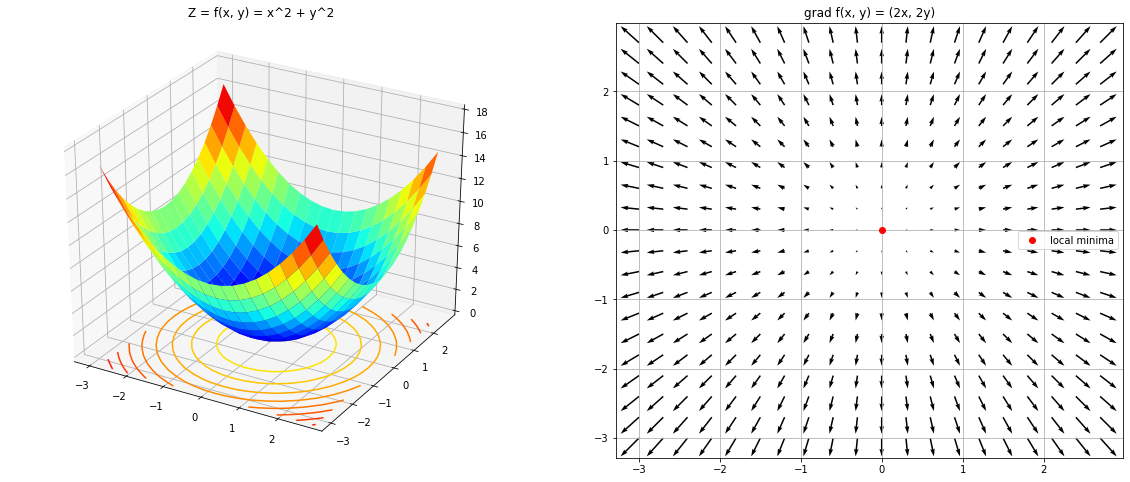

In [178]:
from mpl_toolkits.mplot3d import axes3d

x = np.arange(-3, 3, 0.3)
y = np.arange(-3, 3, 0.3)
X,Y = np.meshgrid(x,y)
Z = X**2 + Y**2


fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax1.title.set_text('Z = f(x, y) = x^2 + y^2')
ax2 = fig.add_subplot(122)
# Plot a 3D surface
ax1.plot_surface(X, Y, Z, cmap = 'jet')
ax1.contour(X,Y,Z,10, cmap="autumn_r", linestyles="solid", offset=-1)
ax2.grid()
ax2.quiver(X, Y, 2*X,2*Y)
ax2.plot(0, 0, 'ro', label = 'local minima')
ax2.title.set_text('grad f(x, y) = (2x, 2y)')
ax2.legend()

#### Example 3.2.
Next, let $$z = f(x, y) = \exp \left( -\dfrac{x^2 + y^2}{2} \right) $$

It is easy to find that

$$ \nabla f (x, y) = (x f(x, y), y f(x, y)) $$

$f$ has $(0, 0)$ be the `critical point` and the `Hessian matrix` is 

$$ H(x, y) = \left( \begin{array}{cc} (x^2-1) f(x, y) & xy f(x, y) \\ x y f(x, y) & (y^2 - 1) f(x, y) \end{array} \right) $$

We have

$$ \det H(0, 0) > 0 \quad \text{and} \quad f_{xx}(0, 0) < 0 $$

so both of them be **`local maximum`** of $f$

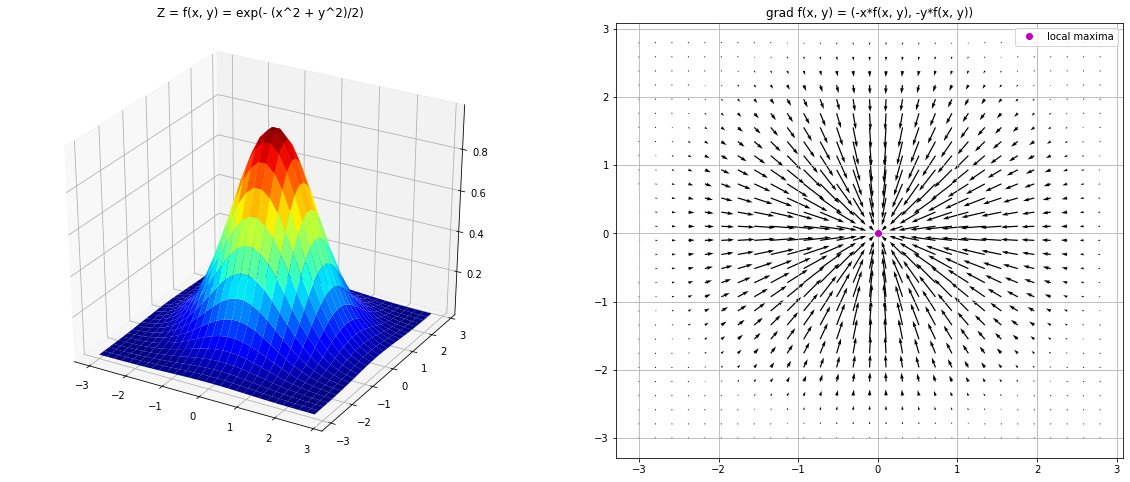

In [179]:
from mpl_toolkits.mplot3d import axes3d

x = np.arange(-3, 3, 6/29)
y = np.arange(-3, 3, 6/29)
X,Y = np.meshgrid(x,y)
Z = np.exp(-(X**2 + Y**2)/2)
fx = -X*Z
fy = -Y*Z

fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax1.title.set_text('Z = f(x, y) = exp(- (x^2 + y^2)/2)')
ax1.plot_surface(X, Y, Z, cmap = 'jet')

ax2 = fig.add_subplot(122)
ax2.grid()
ax2.quiver(X, Y, fx, fy)
ax2.plot(0, 0, 'mo', label = 'local maxima')
ax2.title.set_text('grad f(x, y) = (-x*f(x, y), -y*f(x, y))')
ax2.legend()

#### Example 3.3.
Now, let's consider

$$ f(x, y) = x^2 y - y $$

and hence

$$ \nabla f (x, y) = (2xy, x^2 - 1) $$

The plane $z = f(x, y)$ has 2 critical points be $(\pm 1, 0)$ and the `Hessian matrix` is 

$$ H(x, y) = \left( \begin{array}{cc} 2 & 2x \\ 2x & 0 \end{array} \right) $$

We have

$$ \det H(\pm 1, 0) = -4 < 0 $$

so both of them be **`saddle point`** of $f$

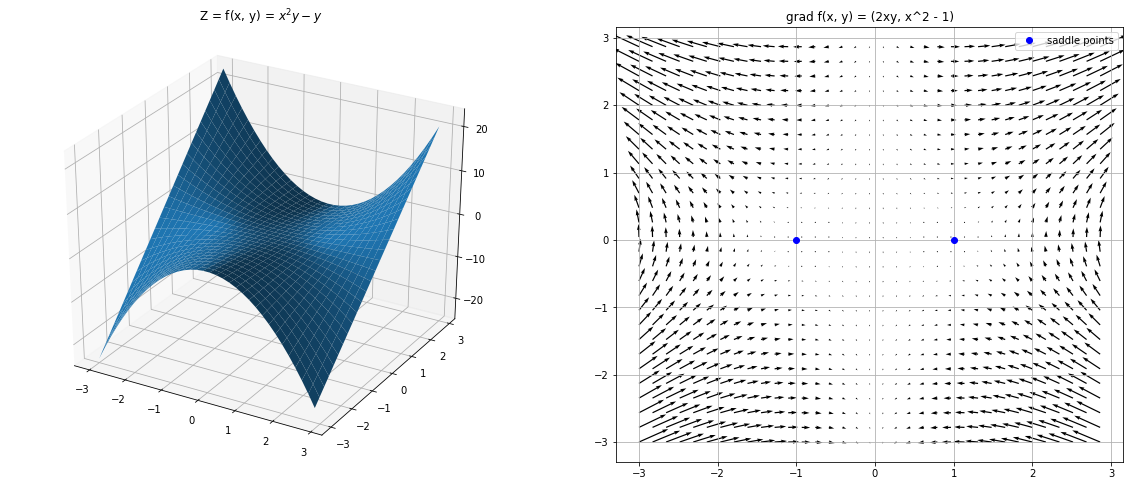

In [173]:
from mpl_toolkits.mplot3d import axes3d

x = np.arange(-3, 3, 5/29)
y = np.arange(-3, 3, 5/23)
X,Y = np.meshgrid(x,y)
Z = X**2*Y - Y
fx = 2*X*Y
fy = X**2 - 1

fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax1.title.set_text('Z = f(x, y) = $x^2 y - y$')
ax1.plot_surface(X, Y, Z)

ax2 = fig.add_subplot(122)
ax2.grid()
ax2.plot([-1, 1], [0, 0], 'bo', label = 'saddle points')
ax2.quiver(X, Y, fx, fy)
ax2.title.set_text('grad f(x, y) = (2xy, x^2 - 1)')
ax2.legend()

#### Example 3.4.
$$z = f(x, y) = \sin x \cos y $$

on $D = [-3, 3] \times [-3, 3]$

We have $$ \nabla f (x, y) = (\cos x \cos y, - \sin x \sin y) $$

and the `critical points` on $D$ here be $\left( \pm \frac{\pi}{2} , 0 \right)$ and $\left( 0, \pm \frac{\pi}{2}\right)$

The `Hessian matrix` is

$$ H(x,y)=\left( \begin{array}{cc} -\sin x \cos y & - \cos x \sin y \\ - \cos x \sin y & -\sin x \cos y \end{array} \right) $$

We have
- $ D \left( 0, \pm \frac{\pi}{2} \right) < 0 $ so both of them are `saddle point`
- $ D \left( \pm \frac{\pi}{2} , 0 \right) > 0 $ but $f_{xx} \left(\frac{\pi}{2} , 0 \right) < 0$ while $f_{xx}\left( - \frac{\pi}{2} , 0 \right) > 0$; so $\left( \frac{\pi}{2} , 0 \right)$ is `local maximum` and $\left( -\frac{\pi}{2} , 0 \right)$ `local minimum`


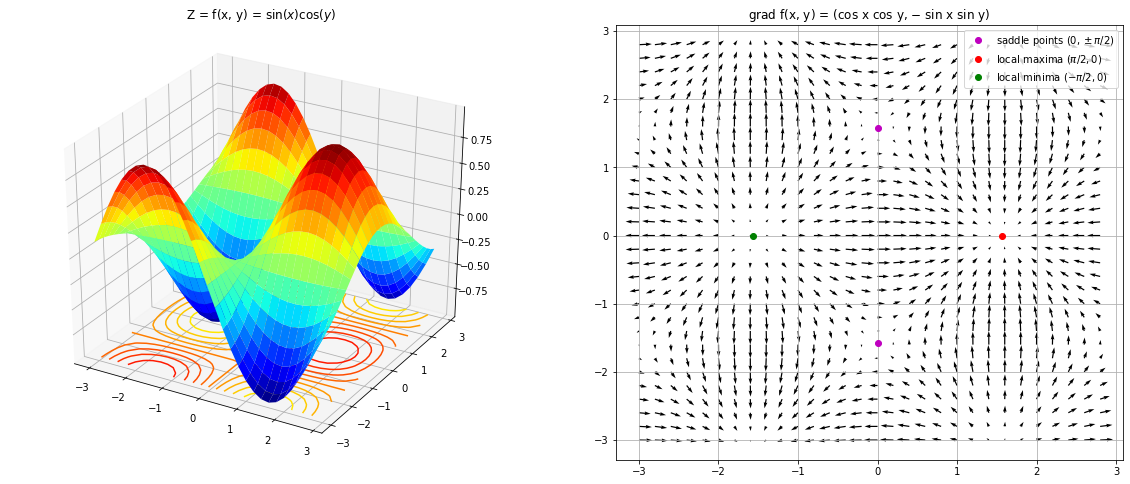

In [216]:
x = np.arange(-3, 3, 0.2)
y = np.arange(-3, 3, 0.2)
X,Y = np.meshgrid(x,y)
Z = np.sin(X)*np.cos(Y)
fx = np.cos(X)*np.cos(Y)
fy = -np.sin(X)*np.sin(Y)

fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax1.title.set_text('Z = f(x, y) = $\sin (x) \cos (y)$')
ax1.plot_surface(X, Y, Z, cmap = 'jet')
ax1.contour(X,Y,Z,10, cmap="autumn_r", linestyles="solid", offset=-1)

ax2 = fig.add_subplot(122)
ax2.grid(True)
ax2.quiver(X, Y, fx, fy)
ax2.plot([0, 0], [-np.pi/2, np.pi/2], 'mo', label = 'saddle points $(0, \pm \pi/2)$')
ax2.plot(np.pi/2, 0, 'ro', label = 'local maxima $(\pi/2 , 0)$')
ax2.plot(-np.pi/2, 0, 'go', label = 'local minima $(-\pi/2 , 0)$')
ax2.title.set_text('grad f(x, y) = (cos x cos y, $-$ sin x sin y)')
ax2.legend(loc=1)

#### Example 3.5.
Expand the domain of example 3.4 to $[-4, 4] \times [-4, 4]$, now the critical points here be

$$ \left( \pm \pi, \pm \frac{\pi}{2} \right), \left( 0 , \pm \frac{\pi}{2} \right), \left( \pm \frac{\pi}{2}, 0 \right), \left( \pm \frac{\pi}{2}, \pm \pi \right) $$

Likewise,
- The `saddle points` are $\left( \pm \pi, \pm \frac{\pi}{2} \right), \left( 0 , \pm \frac{\pi}{2} \right)$
- The `local minimum` are $\left( -\frac{\pi}{2}, 0 \right)$ and $\left( \frac{\pi}{2}, \pm \pi \right)$
- The `local maximum` are $\left( \frac{\pi}{2}, 0\right)$ and $\left( -\frac{\pi}{2}, \pm \pi \right)$

Verify again with the following code

In [191]:
pi = np.pi
crit_pts = [[-pi, pi/2], [-pi, -pi/2], [0, pi/2], [0, -pi/2], [-pi/2, 0], [pi/2, 0],
           [-pi/2, -pi], [-pi/2, pi], [pi/2, -pi], [pi/2, pi]]
def Det(x, y):
    a, b, c, d = np.sin(x), np.cos(x), np.cos(y), np.sin(y)
    det = a**2*c**2 - b**2*d**2
    fxx = -a*c
    if det < 0:
        print('(%.2f, %.2f)\tis saddle point since det = %.2f '%(x, y, det))
    elif det == 0:
        print('(%.2f, %.2f)\tis nothing since det = %.2f'(x, y, det))
    else:
        if fxx > 0:
            print('(%.2f, %.2f)\tis local minima since det = %.2f and fxx = %.2f'%(x, y, det, fxx))
        elif fxx < 0:
            print('(%.2f, %.2f)\tis local maxima since det = %.2f and fxx = %.2f'%(x, y, det, fxx))
        else:
            print('(%.2f, %.2f)\tis nothing since det = %.2f and fxx = %.2f'%(x, y, det, fxx))
for cr_pt in crit_pts: 
    Det(cr_pt[0], cr_pt[1])

(-3.14, 1.57)	is saddle point since det = -1.00 
(-3.14, -1.57)	is saddle point since det = -1.00 
(0.00, 1.57)	is saddle point since det = -1.00 
(0.00, -1.57)	is saddle point since det = -1.00 
(-1.57, 0.00)	is local minima since det = 1.00 and fxx = 1.00
(1.57, 0.00)	is local maxima since det = 1.00 and fxx = -1.00
(-1.57, -3.14)	is local maxima since det = 1.00 and fxx = -1.00
(-1.57, 3.14)	is local maxima since det = 1.00 and fxx = -1.00
(1.57, -3.14)	is local minima since det = 1.00 and fxx = 1.00
(1.57, 3.14)	is local minima since det = 1.00 and fxx = 1.00


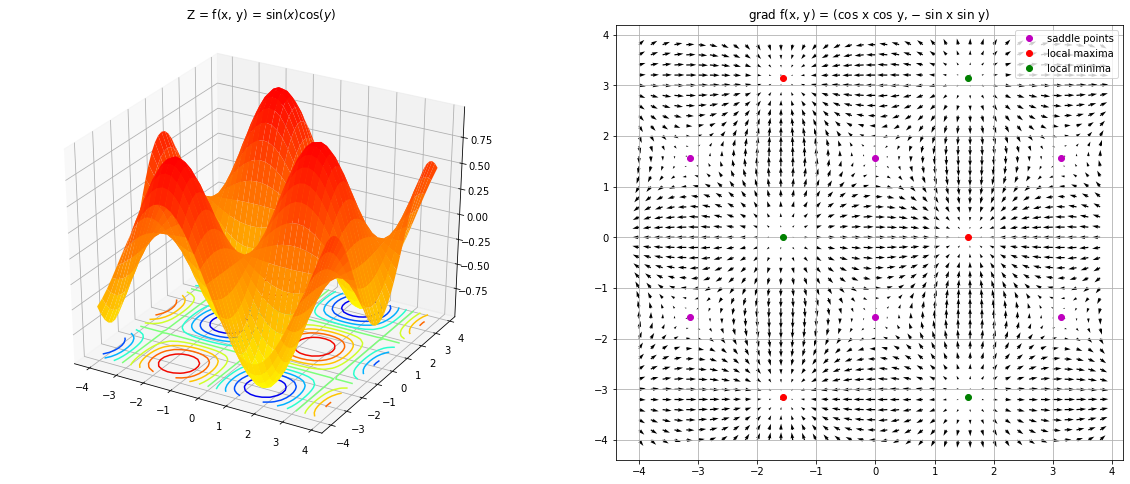

In [199]:
x = np.arange(-4, 4, 0.2)
y = np.arange(-4, 4, 0.2)
X,Y = np.meshgrid(x,y)
Z = np.sin(X)*np.cos(Y)
fx = np.cos(X)*np.cos(Y)
fy = -np.sin(X)*np.sin(Y)

fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax1.title.set_text('Z = f(x, y) = $\sin (x) \cos (y)$')
ax1.plot_surface(X, Y, Z, cmap="autumn_r")
ax1.contour(X,Y,Z,10, cmap="jet", linestyles="solid", offset=-1)

ax2 = fig.add_subplot(122)
ax2.grid()
ax2.quiver(X, Y, fx, fy)
ax2.plot([-pi, -pi, 0, 0, pi, pi], [pi/2, -pi/2, -pi/2, pi/2, -pi/2, pi/2], 'mo', label = 'saddle points')
ax2.plot([pi/2, -pi/2, -pi/2], [0, -pi, pi], 'ro', label = 'local maxima')
ax2.plot([-pi/2, pi/2, pi/2], [0, -pi, pi], 'go', label = 'local minima')
ax2.title.set_text('grad f(x, y) = (cos x cos y, $-$ sin x sin y)')
ax2.legend()

### 4. Gradient of $f(x, y, z)$ - vector field in $\mathbb{R}^3$

For example, let

$$\vec{F}(x, y ,z) = y \vec{i} + z \vec{j} - 2x \vec{k}$$

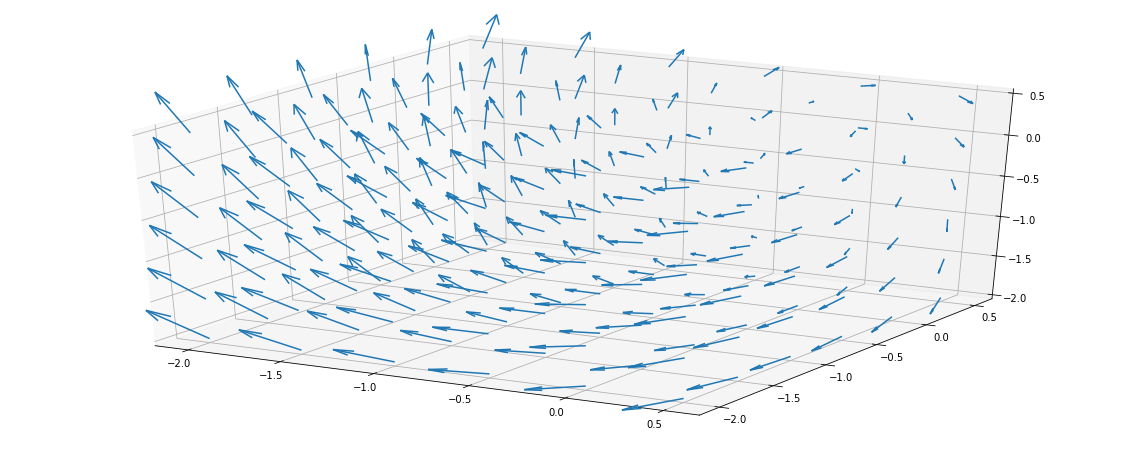

In [247]:
x = np.arange(-2, 1, 0.5)
y = np.arange(-2, 1, 0.5)
z = np.arange(-2, 1, 0.5)
x, y, z = np.meshgrid(x, y, z)
u = y
v = z
w = -2*x

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(projection='3d')
ax.quiver(x, y, z, u, v, w, length=0.1)

We have found that

$$ \text{curl} \vec{F} = (-1,2,-1), \quad \text{div} \vec{F} = 0 $$


**Reminder. `Curl & Divergence`** 

Now, we asign $\vec{F} = P \vec{i} + Q \vec{j} + R \vec{k}$ where

$$ P = P(x, y, z) , \quad Q = Q(x, y, z) \text{ and } R = R(x, y, z) $$
so, we have

- The operator `curl F` is defined by 

$$ \text{curl} \vec{F} = \left( R_y - Q_z \right) \vec{i} + \left( P_z - R_x \right) \vec{j} + \left( Q_x - P_y \right) \vec{k}  = \nabla \times \vec{F}$$

-  The operator `div F` is defined by 

$$ \text{div} \vec{F} = P_x + Q_y + R_z = \nabla \circ F $$

- If $f(x, y, z)$ has continuous second order partial derivatives then $$ \text{curl} \left( \nabla f \right) = \vec{0} $$

- If $F(x, y, z)$ is a `conservative vector field` then $ \text{curl} \vec{F} = \vec{0} $

- If $\text{curl} \vec{F} = \vec{0}$ then the fluid is called irrotational.

- If $F$ is defined on all of $\mathbb{R}^3$ whose components have continuous first order partial derivative and $ \text{curl} \vec{F} = \vec{0} $ then $F$ is a `conservative vector field`

----------------------------

To find the `potential function f for the vector field` $F$, we firstly have to verify that the continuous of  all the first order partial derivative and $ \text{curl} \vec{F} = \vec{0} $. We have

$$ P = y, Q = z, R = -2x $$
so
$$ \text{curl} \vec{F} = \left( R_y - Q_z \right) \vec{i} + \left( P_z - R_x \right) \vec{j} + \left( Q_x - P_y \right) \vec{k}  = (-1, 2, -1) \neq \vec{0}$$

hence $F$ is not a `conservative vector field`

Another example that the condition $ \text{curl} \vec{F} = \vec{0} $ can not make sure $F$ be `conservative` is

$$ F(x, y, z) = \left( -\frac{y}{x^2 + y^2} , \frac{x}{x^2 + y^2}, 0 \right) $$

defined on $D = \lbrace (x, y, z) : x, y \neq 0, z \in \mathbb{R} \rbrace$

Indeed, we have

$$ P = -\frac{y}{x^2 + y^2} ,\quad Q = \frac{x}{x^2 + y^2}, \quad R = 0 $$

so

$$ R_x = 0, R_y =0, P_z = 0, Q_z = 0, P_y = \dfrac{y^2 - x^2}{(x^2 + y^2)^2} = Q_x $$

Hence

$$ \text{curl} \vec{F} = \left( \left( R_y - Q_z \right) , \left( P_z - R_x \right) + \left( Q_x - P_y \right) \right) = \vec{0} $$

Beside that, the first order derivative $P_y(x, y)$ is not continuous at $(0, 0)$ since

$$ \lim_{n \to \infty} P_y(1/n, 1/n) = 0, \quad \text{while } \lim_{n \to \infty} P_y(1/n, 0) = -\infty $$

so $F$ is not a `conservative vector field`

Now, we consider

$$ \vec{F}(x, y, z) = (yz, xz , xy) $$

Again, this is easy to verify that all the first order partial derivative are continuous and $ \text{curl} \vec{F} = \vec{0}$, Next, let

$$ f(x, y, z) = \int P(x,y,z) dx = xyz + g(y, z) $$

Note that this time the `“constant of integration”` will be a function of both $y, z$ since differentiating anything of that form w.r.t $x$ will differentiate to zero.

Next, differentiate this w.r.t $y$ and set it equal to $Q$, we obtain


$$ f_y(x, y ,z) = xz + g_y(y, z) = Q(x, y ,z) = xz $$

So we have

$$ g(y, z) = \int g_y(y,z) dy = \int 0 dy = zy - xy + h(z) $$

or

$$ f(x, y, z) = xzy + h(z) $$

Finally,

$$ f_z(x,y,z) = xy + h_z = xy $$

so $$ h(z) = C $$

Hence
$$ f = xyz + C $$